In [1]:
# load all the json files
import json
import os
import sys

def load_json_files(logdir: str) -> list:
    json_files = []
    for root, dirs, files in os.walk(logdir):
        for file in files:
            if file.endswith('.json'):
                json_files.append(os.path.join(root, file))
                
    return json_files

In [3]:
logdir = "./"
json_files = load_json_files(logdir)

slo_violations = []
profile_optimal = None

for file in json_files:
    with open(file, "r") as f:
        data = json.load(f)
        slo_violations.append({data["strategy"]: data["total_slo_violation"]})
        
        if data["strategy"] == "OPTIMAL":
            sub_data = {
                "predicted_latencies": data["predicted_latencies"],
                "actual_latencies": data["actual_latencies"],
                "actual_finish_times": data["actual_finish_time"],
                "target_slos": data["slo_list"],
                "running_order": data["running_order"],
                "individual_slo_violations": data["individual_slo_violation"]
            }
            profile_optimal = sub_data
            
print(slo_violations)
print(profile_optimal)

[{'OPTIMAL': 3.2965282133937492}, {'FIFO': 369.7878765589013}, {'SRTF': 379.7365166185455}, {'RANDOM': 578.2296865431464}]
{'predicted_latencies': [2.837659288446938, 2.8459311662797173, 2.870405335102517, 2.925519851748411, 2.9100574008887232, 2.963180040260646, 3.02738300048952, 2.9922837970438194, 3.041024306413005, 3.054437969219466], 'actual_latencies': [2.610628662109375, 2.608890380859375, 2.614275634765625, 2.6393046875, 2.634351318359375, 2.692802001953125, 2.7134990234375, 2.702892578125, 2.7213740234375, 2.725334716796875], 'actual_finish_times': [24.029001708984374, 15.971664306640626, 2.614275634765625, 13.362773925781251, 26.66335302734375, 5.30707763671875, 8.02057666015625, 10.72346923828125, 18.693038330078124, 21.418373046875], 'target_slos': [23, 18, 3, 13, 28, 5, 10, 12, 19, 20], 'running_order': [2, 5, 6, 7, 3, 1, 8, 9, 0, 4], 'individual_slo_violations': [1.0588445170927632, 0.0, 0.0, 0.13160492122674095, 0.0, 0.09429667497277273, 0.0, 0.0, 0.0, 2.0117821001014726

/tmp/ipykernel_903649/2458556855.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


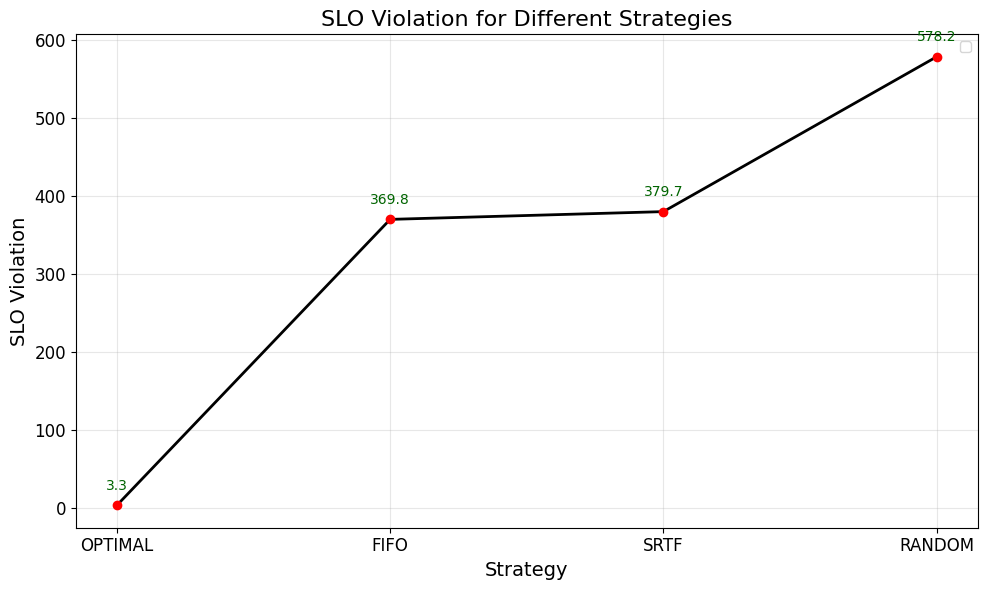

In [13]:
# Draw a graph for total slo violations

import matplotlib.pyplot as plt
import numpy as np

strategies = []
values = []

for entry in slo_violations:
    for strategy, violation in entry.items():
        strategies.append(strategy)
        values.append(violation)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(range(len(strategies)), values, color="black", linewidth=2)
plt.scatter(range(len(strategies)), values, color="red", zorder=5)

# Add value annotations
for i, value in enumerate(values):
    plt.text(i, value + 20, f'{value:.1f}', ha='center', fontsize=10, color="darkgreen")

# Setting labels and title
plt.xticks(range(len(strategies)), strategies, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Strategy", fontsize=14)
plt.ylabel("SLO Violation", fontsize=14)
plt.title("SLO Violation for Different Strategies", fontsize=16)
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

In [15]:
# Generate latex code for the table (OPTIMAL strategy)
import pandas as pd

data = profile_optimal

# Create DataFrame
df = pd.DataFrame(data)

# Truncate to 3 decimal places
df = df.round(3)

# Generate LaTeX table
latex_table = df.to_latex(index=False, float_format="%.3f", caption="Performance Metrics (Truncated to 3 Decimal Places)", label="tab:performance_metrics")
print(latex_table)

\begin{table}
\caption{Performance Metrics (Truncated to 3 Decimal Places)}
\label{tab:performance_metrics}
\begin{tabular}{rrrrrr}
\toprule
predicted_latencies & actual_latencies & actual_finish_times & target_slos & running_order & individual_slo_violations \\
\midrule
2.838 & 2.611 & 24.029 & 23 & 2 & 1.059 \\
2.846 & 2.609 & 15.972 & 18 & 5 & 0.000 \\
2.870 & 2.614 & 2.614 & 3 & 6 & 0.000 \\
2.926 & 2.639 & 13.363 & 13 & 7 & 0.132 \\
2.910 & 2.634 & 26.663 & 28 & 3 & 0.000 \\
2.963 & 2.693 & 5.307 & 5 & 1 & 0.094 \\
3.027 & 2.713 & 8.021 & 10 & 8 & 0.000 \\
2.992 & 2.703 & 10.723 & 12 & 9 & 0.000 \\
3.041 & 2.721 & 18.693 & 19 & 0 & 0.000 \\
3.054 & 2.725 & 21.418 & 20 & 4 & 2.012 \\
\bottomrule
\end{tabular}
\end{table}

